<a href="https://colab.research.google.com/github/Lucas-300/AnaliseID/blob/main/SinaisDeTransito_Classifica%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Projeto Classificação de Sinais de Transito

Neste projeto, usarei uma Rede Neural Convolucional para construir, treinar e testar um modelo de classificação de sinais de trânsito. Construirei este modelo utilizando tensorflow e keras. Trata-se de um problema de classificação multiclasse. Este modelo pode ser utilizado para tornar os carros mais inteligentes.

##Utilidade
* Este modelo pode ser usado em carros autônomos, o que lhes permitirá
reconhecer automaticamente os sinais de trânsito, da mesma forma que o sistema de alerta ao motorista dentro dos carros ajudará e protegerá os motoristas, compreendendo os sinais de trânsito ao seu redor.

##Etapas do Projeto

1. Configuração do Ambiente

Instalação de Bibliotecas: Instalação de pacotes essenciais como kaggle para acessar datasets e outras bibliotecas necessárias.
Autenticação: Configuração do arquivo kaggle.json para acessar datasets privados do Kaggle.

2. Download e Preparação dos Dados

Criação de Diretórios: Criação de diretórios para armazenar e organizar os dados.
Download do Dataset: Download do conjunto de dados de placas de trânsito do Kaggle.
Descompactação e Limpeza: Descompactação dos arquivos e remoção de arquivos desnecessários.

3. Exploração e Análise dos Dados

Visualização Inicial: Visualização de algumas imagens para entender o formato e a qualidade dos dados.
Análise das Dimensões das Imagens: Cálculo das dimensões das imagens para verificar a consistência do tamanho das imagens.

4. Pré-processamento das Imagens

Redimensionamento das Imagens: Redimensionamento das imagens para um tamanho uniforme (50x50 pixels).
Normalização: Escalonamento dos valores dos pixels para o intervalo [0, 1].

5. Divisão dos Dados

Separação em Conjuntos de Treinamento e Validação: Divisão dos dados em conjuntos de treinamento e validação para avaliar o desempenho do modelo.

6. Codificação dos Rótulos

Conversão dos Rótulos: Transformação dos rótulos em uma forma adequada para treinamento, utilizando codificação one-hot.

7. Construção do Modelo

Definição da Arquitetura: Criação de um modelo de rede neural convolucional (CNN) com camadas de convolução, pooling e fully connected.
Compilação do Modelo: Configuração da função de perda, otimizador e métricas de avaliação.

8. Treinamento do Modelo

Treinamento: Ajuste dos pesos do modelo usando os dados de treinamento e validação durante um número definido de épocas.

9. Avaliação e Visualização dos Resultados

Avaliação do Desempenho: Plotagem das métricas de precisão e perda durante o treinamento e validação para avaliar o desempenho do modelo.
Visualização de Imagens de Teste: Exibição das imagens de teste com os rótulos reais e previstos para verificar a eficácia do modelo.

10. Predição em Novos Dados

Previsões com o Modelo: Uso do modelo treinado para prever rótulos de novas imagens de teste.
Mapeamento de Rótulos: Conversão dos índices previstos para rótulos descritivos usando a lista all_labels.

**Base de Dados**
 https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

#Projeto

conectando ao Kaggle usando a API do Kaggle

In [ ]:
#selecione o arquivo kaggle.json baixado da página de configurações da conta Kaggle.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bluessman","key":"026c136f93ef1c6ab5d13e3fecb6d518"}'}

Instalando a API do Kaggle usando pip

In [ ]:
# instalando o cliente da API do Kaggle.
!pip install -q kaggle

Configurando o Kaggle usando a API Kaggle.

In [ ]:
#configurando a autenticação para utilizar a API do Kaggle no Google Colab.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Esta alteração de permissões evita um aviso na inicialização da ferramenta Kaggle.
!chmod 600 ~/.kaggle/kaggle.json

Para armazenar os dados, criaremos um novo diretório e torná-lo-emos o diretório de trabalho atual.

In [ ]:
# Criando diretório e alterando o diretório de trabalho atual
!mkdir traffic_sign_dataset
%cd traffic_sign_dataset

/content/traffic_sign_dataset


Pesquisando no Kaggle o conjunto de dados necessário usando as opções de pesquisa com o título 'dogbreedidfromcomp'.

In [ ]:
# Procurando por conjunto de dados
!kaggle datasets list -s gtsrb-german-traffic-sign

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
meowmeowmeowmeowmeow/gtsrb-german-traffic-sign                     GTSRB - German Traffic Sign Recognition Benchmark  612MB  2018-11-25 18:12:34         111559       1116  0.8235294        
valentynsichkar/traffic-signs-preprocessed                         Traffic Signs Preprocessed                           4GB  2019-08-31 18:22:11          14825        288  1.0              
harbhajansingh21/german-traffic-sign-dataset                       German Traffic Sign Dataset                        118MB  2023-07-11 04:21:24           1047         31  1.0              
ibrahimkaratas/gtsrb-german-traffic-sign-recogniti

Fazendo o download dos dados no notebook collab usando as referências encontradas na opção de pesquisa

In [ ]:
# # Baixando o conjunto de dados e saindo do diretório
!kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
%cd ..

Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 97% 596M/612M [00:04<00:00, 168MB/s]
100% 612M/612M [00:04<00:00, 129MB/s]
/content


Descompactando os dados baixados e removendo os arquivos irrelevantes.

In [ ]:
# Descompactando o arquivo baixado e removendo o arquivo inutilizável
!unzip traffic_sign_dataset/gtsrb-german-traffic-sign.zip -d traffic_sign_dataset
!rm traffic_sign_dataset/gtsrb-german-traffic-sign.zip
!rm -rf traffic_sign_dataset/Meta
!rm -rf traffic_sign_dataset/meta
!rm -rf traffic_sign_dataset/test
!rm -rf traffic_sign_dataset/train
!rm traffic_sign_dataset/Meta.csv

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: traffic_sign_dataset/train/5/00005_00053_00010.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00011.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00012.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00013.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00014.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00015.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00016.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00017.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00018.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00019.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00020.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00021.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00022.png  
  inflating: traffic_sign_dataset/train/5/00005_00053_00023.png  
  inflating: traf

Importando bibliotecas necessárias.

In [ ]:
# Importando Bibliotecas
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns
import random
from PIL import Image
from sklearn.model_selection import  train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D

Visualizando algumas imagens de sinais de trânsito do conjunto de dados de teste. podemos ver aqui que a dimensão das imagens é desigual.

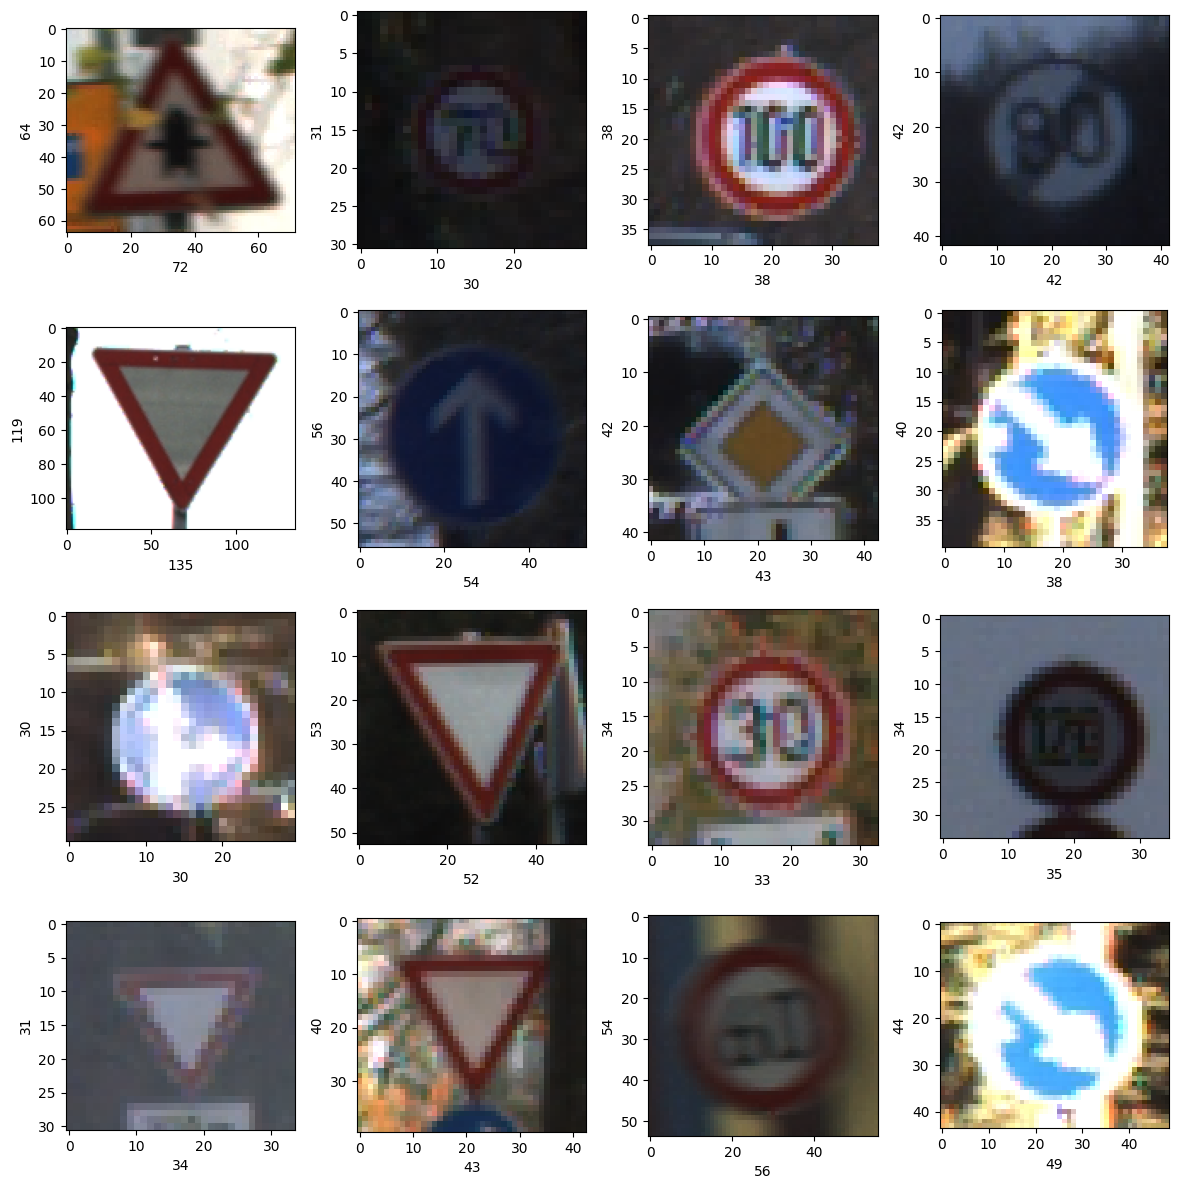

In [ ]:
# Plotando 12 imagens para verificar o conjunto de dados
plt.figure(figsize=(12,12))
path = "traffic_sign_dataset/Test"
for i in range(1,17):
    plt.subplot(4,4,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(os.listdir(path))))
    plt.imshow(rand_img)
    plt.xlabel(rand_img.shape[1], fontsize = 10)#largura da imagem
    plt.ylabel(rand_img.shape[0], fontsize = 10)#altura da imagem

Para processamento posterior, há a necessidade de imagens da mesma dimensão. Assim, começaremos a armazenar a dimensão de todas as imagens do conjunto de dados de treinamento de todas as 43 classes.

In [ ]:
# Como os tamanhos das imagens são diferentes, é necessario torná-las iguais.Tomando a média das dimensões
dim1 = []
dim2 = []

for i in range(0,43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = imread(labels + '/' + x)
        dim1.append(img.shape[0])
        dim2.append(img.shape[1])

Agora vamos descobrir o valor médio de ambas as dimensões e analisá-las. Aqui podemos ver que (50,50) é a forma média de todas as imagens.

In [ ]:
#Impressão da dimensão média das imagens
print("Dimension 1 Mean : ",np.mean(dim1), " Dimension 2 Mean : ",np.mean(dim2))

Dimension 1 Mean :  50.328929582493814  Dimension 2 Mean :  50.83587951745773


Agora vamos remodelar as imagens em (50,50) e também armazenar seus IDs de rótulos.

In [ ]:
# Remodelando as imagens para (50,50)
images = []
label_id = []

for i in range(43):
    labels = 'traffic_sign_dataset/Train' + '/{0}'.format(i)
    image_path = os.listdir(labels)
    for x in image_path:
        img = Image.open(labels + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)
        label_id.append(i)

Agora vamos converter todas as imagens em numpy array e normalizá-las

In [ ]:
#Convertendo imagens em array numpy
images = np.array(images)
#O valor do pixel de cada imagem varia entre 0 e 255
#Dividir cada imagem por 255 dimensionará os valores entre 0 e 1. Isso também é conhecido como normalização.
images = images/255


Armazenando os IDs dos rótulos em um array numpy e imprimindo a forma. Aqui podemos observar que são 39209 IDs de rótulos.



In [ ]:
label_id = np.array(label_id)
label_id.shape

(39209,)

Verificando o formato das imagens. Aqui podemos ver que são 39209 imagens com formato de (50,50,3.)

In [ ]:
images.shape

(39209, 50, 50, 3)

Agora observaremos imagens por classe para verificar se os dados estão balanceados ou não. Pelo resultado podemos dizer que os dados estão balanceados

In [ ]:
# Visualização/contagem do número de classes
label_counts = pd.DataFrame(label_id).value_counts()
label_counts.head()

2     2250
1     2220
13    2160
12    2100
38    2070
Name: count, dtype: int64

Dividindo os dados em treinamento e validação com 80% de dados de treinamento e 20% de dados de validação.

In [ ]:
#Dividindo os dados
x_train, x_val, y_train, y_val = train_test_split(images, label_id , test_size = 0.2, random_state = 42)

Convertendo a coluna de classes em categórica usando a função to_categorical()

In [ ]:
#keras possui uma função integrada para codificação one-hot.
y_train_cat = to_categorical(y_train)
y_val_cat = to_categorical(y_val)

Definindo a arquitetura do modelo...Definindo todas as camadas com seu tamanho do kernel do formato de entrada, ativação, etc.

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 64, kernel_size = (3,3), input_shape = x_train.shape[1:], activation = 'relu', padding = 'same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation = 'softmax'))

Compilar o modelo usando métricas, otimizador e perdas conforme necessário e imprimindo o resumo do modelo

In [ ]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2  (None, 25, 25, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 25, 25, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 23, 23, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 11, 11, 64)        0


Treinando o modelo.

In [ ]:
model.fit(x_train, y_train, epochs = 10, batch_size = 128, validation_data = (x_val, y_val), verbose = 2)

Epoch 1/10
246/246 - 22s - loss: 2.5300 - accuracy: 0.3115 - val_loss: 1.3545 - val_accuracy: 0.6771 - 22s/epoch - 91ms/step
Epoch 2/10
246/246 - 20s - loss: 1.2408 - accuracy: 0.6134 - val_loss: 0.5990 - val_accuracy: 0.8632 - 20s/epoch - 83ms/step
Epoch 3/10
246/246 - 20s - loss: 0.8210 - accuracy: 0.7324 - val_loss: 0.3255 - val_accuracy: 0.9424 - 20s/epoch - 82ms/step
Epoch 4/10
246/246 - 21s - loss: 0.6156 - accuracy: 0.7974 - val_loss: 0.2025 - val_accuracy: 0.9634 - 21s/epoch - 83ms/step
Epoch 5/10
246/246 - 20s - loss: 0.5191 - accuracy: 0.8306 - val_loss: 0.1420 - val_accuracy: 0.9723 - 20s/epoch - 83ms/step
Epoch 6/10
246/246 - 20s - loss: 0.4298 - accuracy: 0.8593 - val_loss: 0.1197 - val_accuracy: 0.9786 - 20s/epoch - 82ms/step
Epoch 7/10
246/246 - 20s - loss: 0.3898 - accuracy: 0.8715 - val_loss: 0.0979 - val_accuracy: 0.9769 - 20s/epoch - 81ms/step
Epoch 8/10
246/246 - 20s - loss: 0.3540 - accuracy: 0.8848 - val_loss: 0.0820 - val_accuracy: 0.9821 - 20s/epoch - 82ms/step


Vizualizando a precisão e a perda por época. Armazenando o histórico do modelo no dataframe do pandas e plotando

<Axes: >

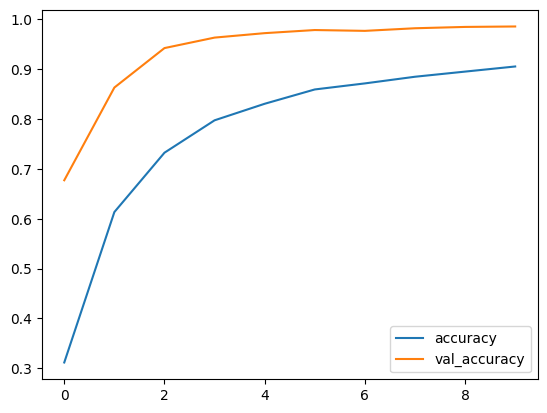

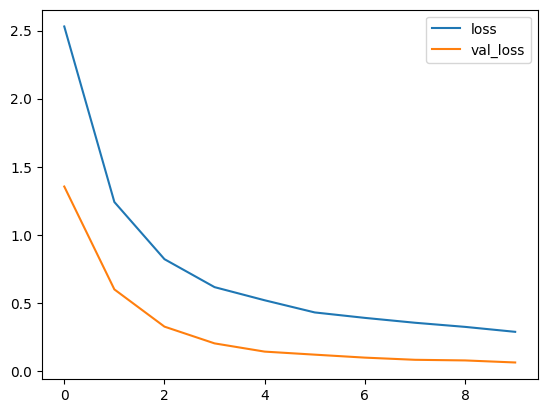

In [ ]:
evaluation = pd.DataFrame(model.history.history)
evaluation[['accuracy', 'val_accuracy']].plot()
evaluation[['loss', 'val_loss']].plot()

Criando a variável que possui o caminho do conjunto de dados de teste. Ao baixar o conjunto de dados, descobri que se trata de um arquivo GT-final_test.csv na pasta de imagens de teste que não pode ser processado. Então, vamos remover esse arquivo.

In [ ]:
test_path = 'traffic_sign_dataset/Test'
!rm traffic_sign_dataset/Test/GT-final_test.csv

Criando uma função e redimensionando as imagens de teste, convertendo-as em um array numpy e normalizando-as.

In [ ]:
#definindo uma função que dimensionará imagens
from PIL import Image

def scaling(test_images, test_path):
    images = []

    image_path = test_images

    for x in image_path:
        img = Image.open(test_path + '/' + x)
        img = img.resize((50,50))
        img = np.array(img)
        images.append(img)

    #Convertendo imagens em array numpy
    images = np.array(images)
    #O valor do pixel de cada imagem varia entre 0 e 255
    #Dividir cada imagem por 255 dimensionará os valores entre 0 e 1. Isso também é conhecido como normalização.
    images = images/255

    return images

Chamando a função criada acima em imagens de teste.

In [ ]:
test_images = scaling(sorted(os.listdir(test_path)),test_path)

A seguir, leremos os IDs dos rótulos de Test.csv e armazenaremos os valores do ID da classe na variável y_test.

In [ ]:
test = pd.read_csv('traffic_sign_dataset/Test.csv')
y_test = test['ClassId'].values
y_test

array([16,  1, 38, ...,  6,  7, 10])

In [ ]:
y_pred = model.predict_classes(test_images);
y_pred

Usando o modelo para fazer previsões em nossas imagens de teste e salvando em y_pred

In [ ]:

# Faz a predição das probabilidades
y_pred_prob = model.predict(test_images)

# Converte as probabilidades para classes
y_pred = np.argmax(y_pred_prob, axis=1)

y_pred

395/395 [==============================] - 2s 6ms/step


array([16,  1, 38, ...,  3,  7, 10])

Armazenando os rótulos de acordo com as classes de imagem

In [ ]:
# Armazenando todos os rotulos
all_lables = ['Speed limit (20km/h)','Speed limit (30km/h)','Speed limit (50km/h)','Speed limit (60km/h)',
              'Speed limit (70km/h)','Speed limit (80km/h)','End of speed limit (80km/h)','Speed limit (100km/h)',
              'Speed limit (120km/h)','No passing','No passing for vechiles over 3.5 metric tons',
              'Right-of-way at the next intersection','Priority road','Yield','Stop','No vechiles',
              'Vechiles over 3.5 metric tons prohibited','No entry','General caution','Dangerous curve to the left',
              'Dangerous curve to the right','Double curve','Bumpy road','Slippery road','Road narrows on the right',
              'Road work','Traffic signals','Pedestrians','Children crossing','Bicycles crossing','Beware of ice/snow',
              'Wild animals crossing','End of all speed and passing limits','Turn right ahead','Turn left ahead',
              'Ahead only','Go straight or right','Go straight or left','Keep right','Keep left','Roundabout mandatory',
              'End of no passing','End of no passing by vechiles over 3.5 metric']

Vamos visualizar a imagem de teste

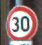

In [ ]:
# Visualizando a imagem de teste
img = Image.open(test_path + '/00001.png')
img

Descobrindo o rótulo original da imagem acima.

In [ ]:
# Rotulo original
print("Original label : ",all_lables[y_test[1]])

Original label :  Speed limit (30km/h)


Descobrindo o rótulo previsto para a imagem acima

In [ ]:
# Rótulo previsto
print("Predicted label : ",all_lables[y_pred[1]])

Predicted label :  Speed limit (30km/h)


## Conclusão:

Começamos baixando o conjunto de dados, pré-processando-o, criamos o modelo e descobrimos as previsões usando o modelo. Durante o pré-processamento descobrimos que este conjunto de dados possui 43 classes. O modelo atingiu uma precisão de 95%+ em apenas 50 épocas, podemos otimizar ainda mais o modelo usando ajuste de hiperparâmetros e alcançar uma precisão maior.